## **ЛАБОРАТОРНАЯ РАБОТА 2**

## **1. Установка библиотеки vk**

In [1]:
#!pip install vk_api

In [2]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

## **2. Подключение по токену**

### **2.1. Создание приложения в разделе "Разработчикам" на сайте vk.com и получение ID приложения**

In [4]:
# 7861558

### **2.2. Получение разрешений**

In [5]:
#https://oauth.vk.com/authorize?client_id=7861558&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends,photos,audio,video,status,wall,groups,notifications,stories,offline&response_type=token
# vk1.a.BNFRxciCHEFJOO1GMaGmZRyGGoG8qdYRDAj78uYPDz3igpc31szFBM1AM1Vl7tOB6BhdhyErSvxl014xNOLRbwGYaCyjbydVOWlaMB7dWslSkADQ21RtU1U-hgPjR5DXtOUS-Y3aLw2EOwJf33Q93cvXXwMDX07MILmpvdFItSbmD2LbASBSW2_TZvvig1KFvzZYenWYp7fbiJEg33NBlQ


### **2.3. Получение токена**

In [6]:
#https://oauth.vk.com/blank.html#access_token=f2c018918cd901eec782b174093bcf6e70d9df70a67fd8567ee3690b6ee35f3728dcdb0a8c30ebaba8f05&expires_in=0&user_id=81423997

### **2.4. Запуск сессии**

In [242]:
import vk_api

session = vk_api.VkApi(token='vk1.a.BNFRxciCHEFJOO1GMaGmZRyGGoG8qdYRDAj78uYPDz3igpc31szFBM1AM1Vl7tOB6BhdhyErSvxl014xNOLRbwGYaCyjbydVOWlaMB7dWslSkADQ21RtU1U-hgPjR5DXtOUS-Y3aLw2EOwJf33Q93cvXXwMDX07MILmpvdFItSbmD2LbASBSW2_TZvvig1KFvzZYenWYp7fbiJEg33NBlQ')
vk = session.get_api()

## **3. Выгрузка друзей**

In [62]:
friends = vk.friends.get()['items']
print(len(friends))

154


In [246]:
fields_name = [
               'first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
               'home_town', 'has_mobile', 'followers_count', 'common_count', 
               'is_closed', 'can_access_closed', 'can_see_audio',
               'online', 'city', 'timezone', 'can_post',
               'can_write_private_message', 'can_see_all_posts',
               'contacts', 'status', 'relation', 'universities',
               'nickname', 'deactivated', 'counters', 'has_photo',
               'occupation', 'site', 'wall_default'
              ]

In [257]:
dict_users_requests = {}
results = []
for i in range(100000, 101000):
  dict_results = {}
  dict_users_requests = {}
  user = vk.users.get(user_ids = i, fields = fields_name)[0]
  for column in fields_name:
    try:
      dict_results = {column: user[column]}
    except:
      dict_results = {column: np.nan}
    finally:
      dict_users_requests.update(dict_results)
  time.sleep(0.3)
  results.append(dict_users_requests)

df = pd.DataFrame(results)

with pd.ExcelWriter('friends.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')

In [3]:
df = pd.read_excel('friends.xlsx')
df

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,0,Екатерина,Ильина,100000,1,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'friends': 106, 'on...",1,"{'name': 'ООО ""?????????""', 'type': 'work'}",NaN,all
1,1,Антон,Ляпцев,100001,2,18.3.1974,"{'id': 1, 'title': 'Россия'}",Череповец,1.0,91.0,...,Life is better with volleyball,0.0,"[{'chair': 1764774, 'chair_name': 'Робототехни...",NaN,NaN,"{'albums': 9, 'audios': 238, 'followers': 61, ...",1,"{'id': 56, 'name': 'СПбГПУ Политех', 'type': '...",NaN,all
2,2,Роман,Мойсеев,100002,2,14.9,"{'id': 1, 'title': 'Россия'}",NaN,0.0,360.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 81, 'f...",1,"{'name': 'RRC', 'type': 'work'}",http://-,all
3,3,Дарина,Полтавец,100003,1,10.3.1988,"{'id': 1, 'title': 'Россия'}",NaN,1.0,1261.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 1088, ...",1,"{'id': 1173072, 'name': 'СПбГЭУ (ранее ФИНЭК, ...",NaN,all
4,4,DELETED,NaN,100004,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,deleted,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Денис,Морозов,100995,2,3.10.1987,"{'id': 1, 'title': 'Россия'}",NaN,1.0,196.0,...,NaN,NaN,NaN,bons,NaN,"{'albums': 6, 'audios': 0, 'followers': 47, 'f...",1,"{'id': 82244618, 'name': 'РАБОТА', 'type': 'wo...",NaN,all
996,996,Дмитрий,Воротников,100996,2,5.1,"{'id': 2, 'title': 'Украина'}",NaN,1.0,913.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 1, 'audios': 0, 'followers': 281, '...",1,"{'id': 2473, 'name': 'ХНУРЭ (бывш. ХИРЭ, ХТУРЭ...",NaN,all
997,997,DELETED,NaN,100997,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,deleted,NaN,0,NaN,NaN,NaN
998,998,Антон,Васильев,100998,2,4.12.1984,"{'id': 1, 'title': 'Россия'}",NaN,1.0,166.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 95, 'followers': 25, '...",1,"{'id': 1786, 'name': 'ВМедА', 'type': 'univers...",NaN,all


## **4. Работа с признаками**

In [4]:
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'pink', 'purple', 'brown', 'grey']

def draw_plot(df, column, xlabel, ylabel, title):
    df.groupby([column]).size().plot(kind = 'bar', color = colors)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()

del df['Unnamed: 0']
df.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'country', 'home_town',
       'has_mobile', 'followers_count', 'common_count', 'is_closed',
       'can_access_closed', 'can_see_audio', 'online', 'city', 'timezone',
       'can_post', 'can_write_private_message', 'can_see_all_posts',
       'contacts', 'status', 'relation', 'universities', 'nickname',
       'deactivated', 'counters', 'has_photo', 'occupation', 'site',
       'wall_default'],
      dtype='object')

In [5]:
# удалить ряды, у которых фамилия DELETED
df = df[df['last_name'] != 'DELETED']
df = df[df['first_name'] != 'DELETED']
df

,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,common_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,Екатерина,Ильина,100000,1,NaN,NaN,NaN,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'friends': 106, 'on...",1,"{'name': 'ООО ""?????????""', 'type': 'work'}",NaN,all
1,Антон,Ляпцев,100001,2,18.3.1974,"{'id': 1, 'title': 'Россия'}",Череповец,1.0,91.0,0.0,...,Life is better with volleyball,0.0,"[{'chair': 1764774, 'chair_name': 'Робототехни...",NaN,NaN,"{'albums': 9, 'audios': 238, 'followers': 61, ...",1,"{'id': 56, 'name': 'СПбГПУ Политех', 'type': '...",NaN,all
2,Роман,Мойсеев,100002,2,14.9,"{'id': 1, 'title': 'Россия'}",NaN,0.0,360.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 81, 'f...",1,"{'name': 'RRC', 'type': 'work'}",http://-,all
3,Дарина,Полтавец,100003,1,10.3.1988,"{'id': 1, 'title': 'Россия'}",NaN,1.0,1261.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 1088, ...",1,"{'id': 1173072, 'name': 'СПбГЭУ (ранее ФИНЭК, ...",NaN,all
5,Stanislav,Komarnitskiy,100005,2,NaN,"{'id': 1, 'title': 'Россия'}",NaN,1.0,246.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 54, 'f...",1,"{'name': 'офис', 'type': 'work'}",NaN,owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Олеся,Сергеева,100993,1,5.10,"{'id': 1, 'title': 'Россия'}",NaN,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'friends': 47, 'onl...",1,"{'id': 58, 'name': 'СПбГТУРП', 'type': 'univer...",NaN,all
994,Александр,Алексеев,100994,2,11.4,"{'id': 1, 'title': 'Россия'}",NaN,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'friends': 162, 'on...",1,"{'id': 59, 'name': 'СПбГТЭУ (бывш. СПбТЭИ)', '...",NaN,all
995,Денис,Морозов,100995,2,3.10.1987,"{'id': 1, 'title': 'Россия'}",NaN,1.0,196.0,0.0,...,NaN,NaN,NaN,bons,NaN,"{'albums': 6, 'audios': 0, 'followers': 47, 'f...",1,"{'id': 82244618, 'name': 'РАБОТА', 'type': 'wo...",NaN,all
996,Дмитрий,Воротников,100996,2,5.1,"{'id': 2, 'title': 'Украина'}",NaN,1.0,913.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 1, 'audios': 0, 'followers': 281, '...",1,"{'id': 2473, 'name': 'ХНУРЭ (бывш. ХИРЭ, ХТУРЭ...",NaN,all


### **4.1. Работа с признаком sex**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


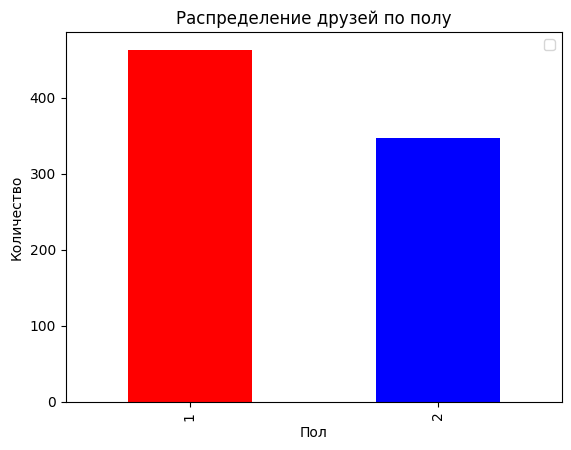

In [6]:
draw_plot(df, 'sex', 'Пол', 'Количество', 'Распределение друзей по полу')

### **4.2. Работа с признаком home_town**

In [7]:
df.home_town.unique()

array([nan, 'Череповец', 'г.Жагань', 'Москва', 'Клайпеда', 'Rotterdam',
       'Санкт-Петербург', 'Ярега', 'Stockholm', '+', 'Novy Urengoy',
       'Санкт-Петербург, Ломоносов', 'Санкт Петербург', 'Питер', 'СПб',
       'Стерлитамак', 'chi', 'Луганск', 'Пушкин', 'Ленинград', 'Тиличики',
       'Петербург, Томск', 'Спб', 'Saint- P.',
       'дер.Цихесулори, г.Санкт-Петербург, г.Тбилиси', 'сургут', 'Тихвин',
       'Балабаново', 'Петербург', 'Нижнекамск',
       'г. Урюпинск, Волгоградской области', 'Алматы', 'Нефтеюганск',
       'Орехово-Зулево', 'Невинномысск', 'Ульяновск',
       'Петропавловск-Камчатский', 'КРАСНОДАР ', 'Одесса', 'Омск',
       'Киров', 'Мск', 'Братск', 'Там где при свете ночи разводят мосты',
       'Ставрополь', 'Пыть-Ях', 'Чирчик', 'Тольятти', 'Царское Село',
       'Всеволожск', 'Владивосток', 'Saint-Petersburg, Auckland',
       'Новый Уренгой', 'Северная  Венеция', 'Сочи', 'Уссурийск',
       'Казань', 'Южно-Сахалинск', 'Костомукша', 'ЛЕНИНГРАД', 'SPb',
      

#### **4.2.1. Чистка городов**

In [8]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['home_town'])
df_copy.home_town.unique()

array(['Череповец', 'г.Жагань', 'Москва', 'Клайпеда', 'Rotterdam',
       'Санкт-Петербург', 'Ярега', 'Stockholm', '+', 'Novy Urengoy',
       'Санкт-Петербург, Ломоносов', 'Санкт Петербург', 'Питер', 'СПб',
       'Стерлитамак', 'chi', 'Луганск', 'Пушкин', 'Ленинград', 'Тиличики',
       'Петербург, Томск', 'Спб', 'Saint- P.',
       'дер.Цихесулори, г.Санкт-Петербург, г.Тбилиси', 'сургут', 'Тихвин',
       'Балабаново', 'Петербург', 'Нижнекамск',
       'г. Урюпинск, Волгоградской области', 'Алматы', 'Нефтеюганск',
       'Орехово-Зулево', 'Невинномысск', 'Ульяновск',
       'Петропавловск-Камчатский', 'КРАСНОДАР ', 'Одесса', 'Омск',
       'Киров', 'Мск', 'Братск', 'Там где при свете ночи разводят мосты',
       'Ставрополь', 'Пыть-Ях', 'Чирчик', 'Тольятти', 'Царское Село',
       'Всеволожск', 'Владивосток', 'Saint-Petersburg, Auckland',
       'Новый Уренгой', 'Северная  Венеция', 'Сочи', 'Уссурийск',
       'Казань', 'Южно-Сахалинск', 'Костомукша', 'ЛЕНИНГРАД', 'SPb',
       'SPB

##### **4.2.1.1. Работа с городом Набережные Челны**

In [9]:
for i in df_copy.home_town:
    if '*̡͌l̡*̡̡ ̴̡ı̴̴̡ ̡̡_|̲̲̲͡͡͡▫ ̲͡ ̲̲̲͡͡π̲̲͡͡ ̲̲͡▫̲|' in i.lower(): df_copy.home_town.replace(i, 'Челябинск', inplace=True)
    elif 'челябинск' in i.lower(): df_copy.home_town.replace(i, 'Челябинск', inplace=True)
    elif 'тольятти' in i.lower(): df_copy.home_town.replace(i, 'Тольятти', inplace=True)
df_copy.home_town.unique()

array(['Череповец', 'г.Жагань', 'Москва', 'Клайпеда', 'Rotterdam',
       'Санкт-Петербург', 'Ярега', 'Stockholm', '+', 'Novy Urengoy',
       'Санкт-Петербург, Ломоносов', 'Санкт Петербург', 'Питер', 'СПб',
       'Стерлитамак', 'chi', 'Луганск', 'Пушкин', 'Ленинград', 'Тиличики',
       'Петербург, Томск', 'Спб', 'Saint- P.',
       'дер.Цихесулори, г.Санкт-Петербург, г.Тбилиси', 'сургут', 'Тихвин',
       'Балабаново', 'Петербург', 'Нижнекамск',
       'г. Урюпинск, Волгоградской области', 'Алматы', 'Нефтеюганск',
       'Орехово-Зулево', 'Невинномысск', 'Ульяновск',
       'Петропавловск-Камчатский', 'КРАСНОДАР ', 'Одесса', 'Омск',
       'Киров', 'Мск', 'Братск', 'Там где при свете ночи разводят мосты',
       'Ставрополь', 'Пыть-Ях', 'Чирчик', 'Тольятти', 'Царское Село',
       'Всеволожск', 'Владивосток', 'Saint-Petersburg, Auckland',
       'Новый Уренгой', 'Северная  Венеция', 'Сочи', 'Уссурийск',
       'Казань', 'Южно-Сахалинск', 'Костомукша', 'ЛЕНИНГРАД', 'SPb',
       'SPB

##### **4.2.1.2. Замена пустых значений и прочих**

In [10]:
df_copy.home_town.replace('nan', 'Другой', inplace=True)
df_copy.home_town.replace('', 'Другой', inplace=True)
df_copy.home_town.replace('Москва ', 'Москва', inplace=True)

for i in df_copy.home_town:
    if 'ессентуки' in i.lower(): df_copy.home_town.replace(i, 'Санкт-Петербург', inplace=True)
    elif 'самара' in i.lower(): df_copy.home_town.replace(i, 'Самара', inplace=True)
    elif 'айхал' in i.lower(): df_copy.home_town.replace(i, 'Айхал', inplace=True)

df_copy.home_town.unique()

array(['Череповец', 'г.Жагань', 'Москва', 'Клайпеда', 'Rotterdam',
       'Санкт-Петербург', 'Ярега', 'Stockholm', '+', 'Novy Urengoy',
       'Санкт-Петербург, Ломоносов', 'Санкт Петербург', 'Питер', 'СПб',
       'Стерлитамак', 'chi', 'Луганск', 'Пушкин', 'Ленинград', 'Тиличики',
       'Петербург, Томск', 'Спб', 'Saint- P.',
       'дер.Цихесулори, г.Санкт-Петербург, г.Тбилиси', 'сургут', 'Тихвин',
       'Балабаново', 'Петербург', 'Нижнекамск',
       'г. Урюпинск, Волгоградской области', 'Алматы', 'Нефтеюганск',
       'Орехово-Зулево', 'Невинномысск', 'Ульяновск',
       'Петропавловск-Камчатский', 'КРАСНОДАР ', 'Одесса', 'Омск',
       'Киров', 'Мск', 'Братск', 'Там где при свете ночи разводят мосты',
       'Ставрополь', 'Пыть-Ях', 'Чирчик', 'Тольятти', 'Царское Село',
       'Всеволожск', 'Владивосток', 'Saint-Petersburg, Auckland',
       'Новый Уренгой', 'Северная  Венеция', 'Сочи', 'Уссурийск',
       'Казань', 'Южно-Сахалинск', 'Костомукша', 'ЛЕНИНГРАД', 'SPb',
       'SPB

### **4.3. Работа с признаком has_mobile**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


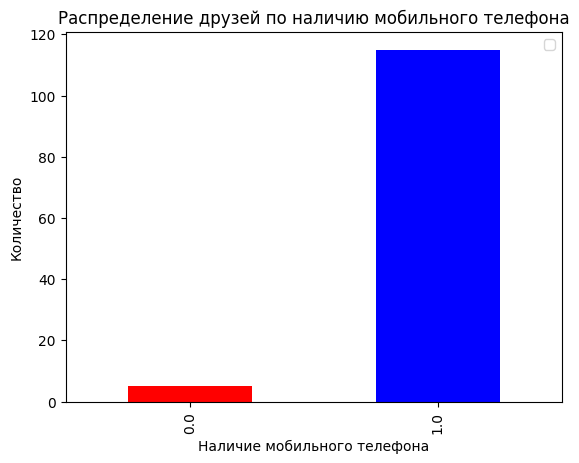

In [11]:
draw_plot(df_copy, 'has_mobile', 'Наличие мобильного телефона', 'Количество', 'Распределение друзей по наличию мобильного телефона')

#### **4.3.1. Удаление признака has_mobile**

In [12]:
df_copy = df_copy.drop(['has_mobile'], axis=1)
df_copy.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'country', 'home_town',
       'followers_count', 'common_count', 'is_closed', 'can_access_closed',
       'can_see_audio', 'online', 'city', 'timezone', 'can_post',
       'can_write_private_message', 'can_see_all_posts', 'contacts', 'status',
       'relation', 'universities', 'nickname', 'deactivated', 'counters',
       'has_photo', 'occupation', 'site', 'wall_default'],
      dtype='object')

### **4.4. Работа с признаком followers_count**

In [13]:
print('Кол-во друзей с неизвестными подписчиками:', df_copy[df_copy['followers_count'].isnull()].shape[0])

Кол-во друзей с неизвестными подписчиками: 0


<Axes: title={'center': 'Кол-во подписчиков'}, xlabel='id', ylabel='followers_count'>

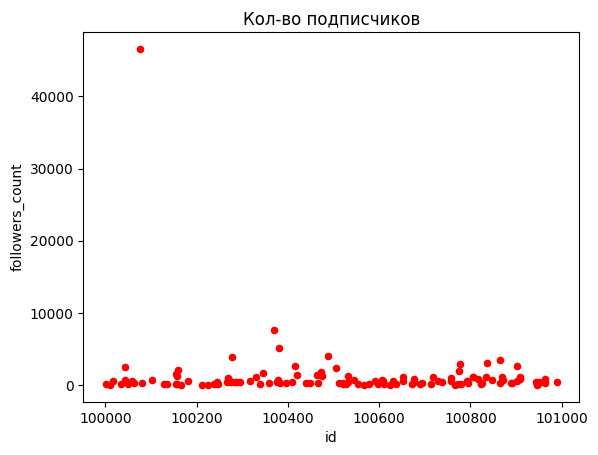

In [14]:
df_copy.plot(kind='scatter', x='id', y='followers_count', color='red', title='Кол-во подписчиков')

<Axes: title={'center': 'Кол-во подписчиков'}, xlabel='id', ylabel='followers_count'>

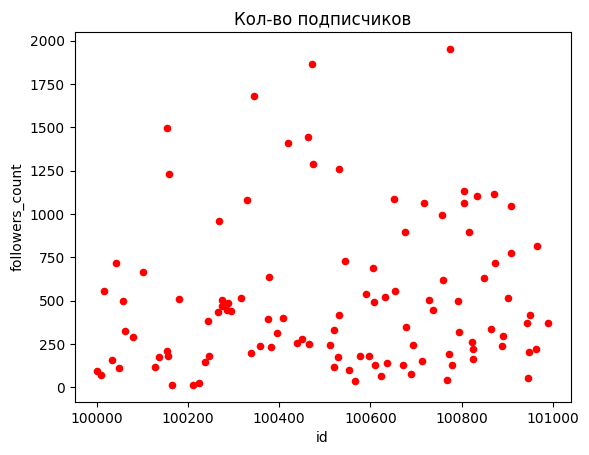

In [15]:
df_copy = df_copy.drop(df_copy[df_copy.followers_count > 2000].index)
df_copy.plot(kind='scatter', x='id', y='followers_count', color='red', title='Кол-во подписчиков')

### **4.5. Работа с признаком is_closed**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


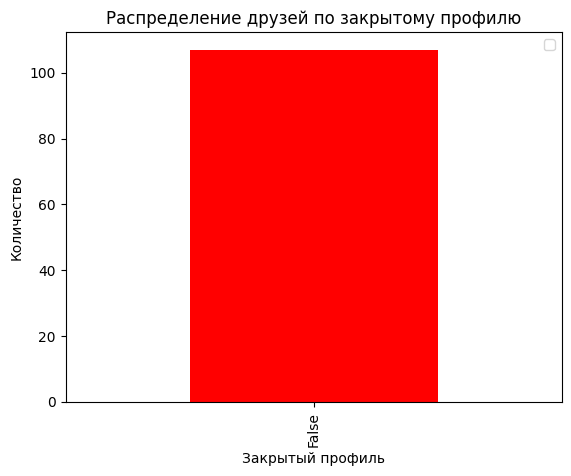

In [16]:
draw_plot(df_copy, 'is_closed', 'Закрытый профиль', 'Количество', 'Распределение друзей по закрытому профилю')

In [17]:
print('Кол-во друзей с пустым значением публичности профиля:', df_copy[df_copy['can_access_closed'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности профиля: 0


In [18]:
df_copy['is_closed'].fillna(False, inplace = True)
del df_copy['is_closed']

### **4.6. Работа с признаком can_access_closed**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


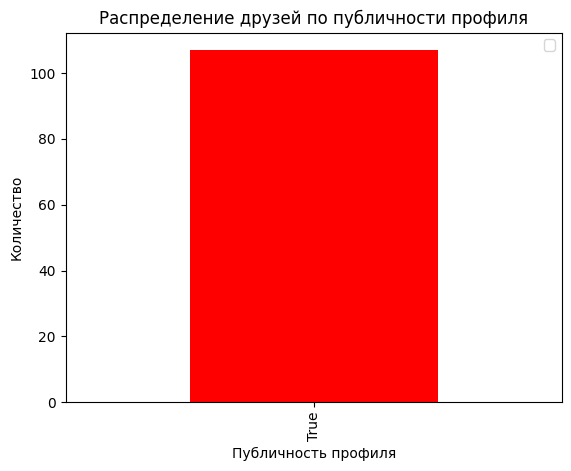

In [19]:
draw_plot(df_copy, 'can_access_closed', 'Публичность профиля', 'Количество', 'Распределение друзей по публичности профиля')

In [20]:
len(df_copy[df_copy.can_access_closed != True])

0

#### **4.6.1. Удаление признака can_access_closed по причине наличия значения True у всех друзей**

In [21]:
del df_copy['can_access_closed']
df_copy.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'country', 'home_town',
       'followers_count', 'common_count', 'can_see_audio', 'online', 'city',
       'timezone', 'can_post', 'can_write_private_message',
       'can_see_all_posts', 'contacts', 'status', 'relation', 'universities',
       'nickname', 'deactivated', 'counters', 'has_photo', 'occupation',
       'site', 'wall_default'],
      dtype='object')

### **4.7. Работа с признаком can_see_audio**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


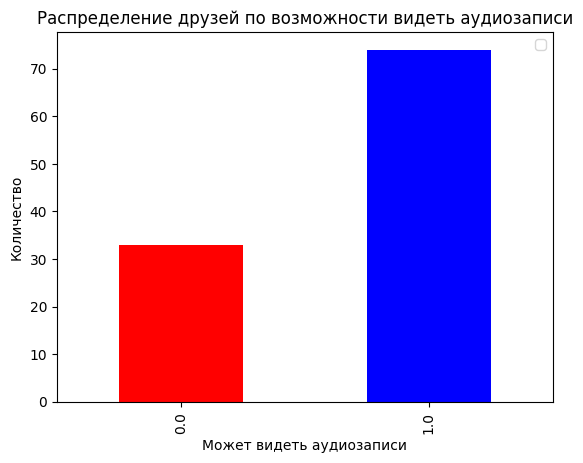

In [22]:
draw_plot(df_copy, 'can_see_audio', 'Может видеть аудиозаписи', 'Количество', 'Распределение друзей по возможности видеть аудиозаписи')

In [23]:
print('Кол-во друзей с пустым значением публичности аудио:', df_copy[df_copy['can_see_audio'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности аудио: 0


### **4.8. Работа с признаком can_see_all_posts**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


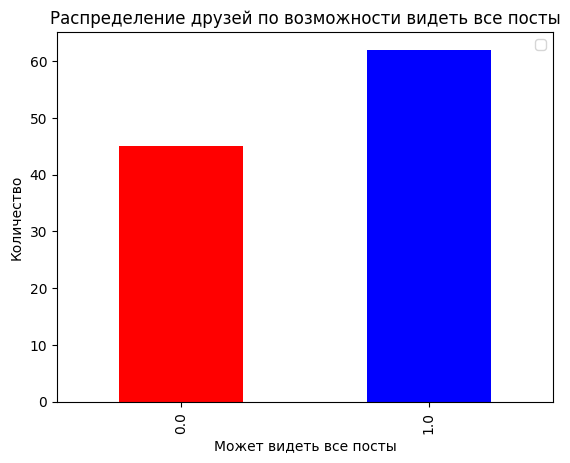

In [24]:

draw_plot(df_copy, 'can_see_all_posts', 'Может видеть все посты', 'Количество', 'Распределение друзей по возможности видеть все посты')

In [25]:
print('Кол-во друзей с пустым значением публичности постов: ', df_copy[df_copy['can_see_all_posts'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности постов:  0


### **4.9. Работа с признаком online**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


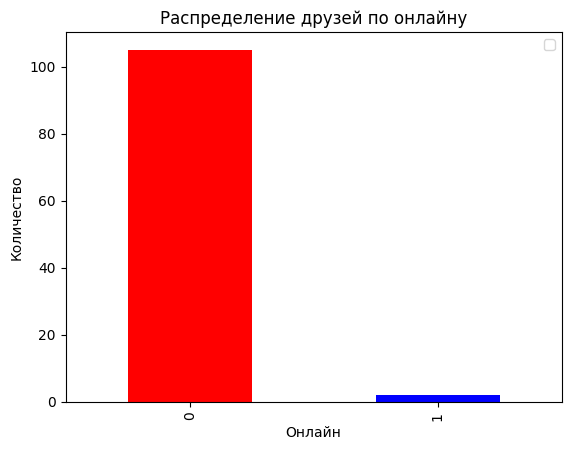

In [26]:
draw_plot(df_copy, 'online', 'Онлайн', 'Количество', 'Распределение друзей по онлайну')

In [27]:
print('Кол-во друзей с пустым значением онлайна: ', df_copy[df_copy['online'].isnull()].shape[0])

Кол-во друзей с пустым значением онлайна:  0


### **4.10. Работа с признаком timezone**

In [28]:
df_copy.timezone.unique()

array([nan])

In [29]:
del df_copy['timezone']

In [30]:
df_copy.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'country', 'home_town',
       'followers_count', 'common_count', 'can_see_audio', 'online', 'city',
       'can_post', 'can_write_private_message', 'can_see_all_posts',
       'contacts', 'status', 'relation', 'universities', 'nickname',
       'deactivated', 'counters', 'has_photo', 'occupation', 'site',
       'wall_default'],
      dtype='object')

### **4.11. Работа с признаком can_post**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


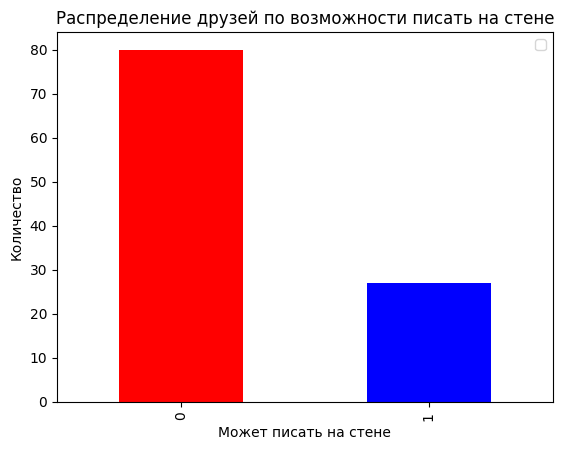

In [31]:
draw_plot(df_copy, 'can_post', 'Может писать на стене', 'Количество', 'Распределение друзей по возможности писать на стене')

In [32]:
print('Кол-во друзей с пустым значением публичности стены: ', df_copy[df_copy['can_post'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности стены:  0


### **4.12. Работа с признаком can_write_private_message**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


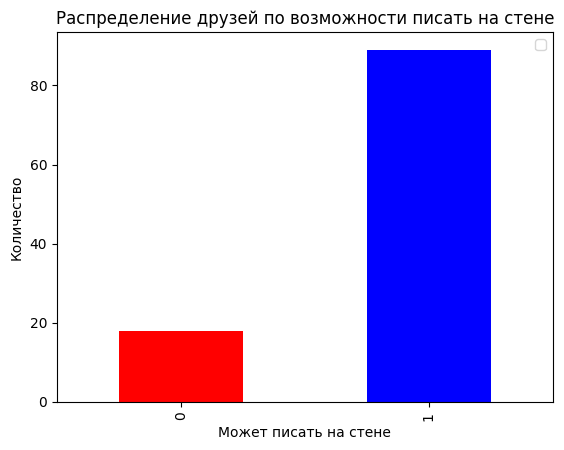

In [33]:
draw_plot(df_copy, 'can_write_private_message', 'Может писать на стене', 'Количество', 'Распределение друзей по возможности писать на стене')

In [34]:
print('Кол-во друзей с не доступом к написанию сообщения: ', df_copy[df_copy['can_write_private_message'] == False].shape[0])

Кол-во друзей с не доступом к написанию сообщения:  18


#### **4.12.1. Удаление признака can_write_private_message по причине его наличия у всех друзей**

In [35]:
del df_copy['can_write_private_message']

### **4.13. Работа с признаком contacts**

In [36]:
df_copy.contacts.unique()

array([nan])

#### **4.13.1. Удаление признака contacts по причине его пустых значений во всех строках**

In [37]:
del df_copy['contacts']

### **4.14. Работа с признаком status**

In [38]:
df_copy.status.unique()

array(['Life is better with volleyball', 'хуй бля', nan, 'Даешь позитив!',
       'Chaos Reigns.', 'Я знаю получше других, как фауна рыщет во флоре',
       '🙀',
       'Наши действительные способности невероятно превосходят наши самые смелые ожидания',
       '« Я совершенно определенно женщина, и это меня радует.» — М.М.',
       'Ничем не могу вас обрадовать: у меня всё хорошо!',
       'Недвижимость в Сочи!!!',
       'https://bookriver.ru/author/darya-karabanova                                            https://litnet.com/ru/darya-karabanova-u373745',
       'идентификатор интерфейса может быть заменён на псевдослучайное число',
       '..воздух с привкусом волшебства🙏',
       'Частная психологическая практика. Пишите.', 'Стоицизм',
       'Желание быть необычным – это очень обычное желание. Расслабиться и быть обычным – по-настоящему необычно. Ошо',
       "Don't tell your problems to people: eighty percent don't care; and the other twenty percent are glad you have them!",
    

#### **4.14.1. Проверка пустых значений статуса**

In [39]:
print('Кол-во друзей с пустым значением статуса: ', df_copy[df_copy['status'].isnull()].shape[0])

Кол-во друзей с пустым значением статуса:  64


#### **4.14.2. Конвертация признака status в категориальный признак с двумя значениями**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


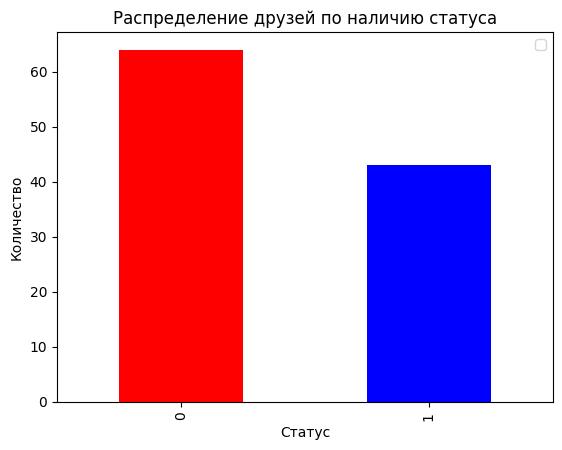

In [40]:
df_copy_status = df_copy.copy()
df_copy_status['status'].fillna(0, inplace = True)
df_copy_status['status'] = df_copy_status['status'].apply(lambda x: 1 if x != 0 else 0)
draw_plot(df_copy_status, 'status', 'Статус', 'Количество', 'Распределение друзей по наличию статуса')

### **4.15. Работа с признаком relation**

In [41]:
df_copy_relation = df_copy_status.copy(deep=True)
df_copy_relation.relation.unique()

array([0., 4., 1., 2., 7., 5., 6.])

In [42]:
df_copy_relation['relation'].fillna(0, inplace = True)

#### **4.15.1. Категоризация признака relation**

In [43]:
for i in df_copy_relation.relation:
  if i == 0: df_copy_relation.relation.replace(i, 'A', inplace=True)
  elif i == 1: df_copy_relation.relation.replace(i, 'B', inplace=True)
  elif i == 2: df_copy_relation.relation.replace(i, 'C', inplace=True)
  elif i == 3: df_copy_relation.relation.replace(i, 'D', inplace=True)
  elif i == 4: df_copy_relation.relation.replace(i, 'E', inplace=True)
  elif i == 5: df_copy_relation.relation.replace(i, 'F', inplace=True)
  elif i == 6: df_copy_relation.relation.replace(i, 'G', inplace=True)
  elif i == 7: df_copy_relation.relation.replace(i, 'H', inplace=True)
  elif i == 8: df_copy_relation.relation.replace(i, 'I', inplace=True)

df_copy_relation.relation.unique()

array(['A', 'E', 'B', 'C', 'H', 'F', 'G'], dtype=object)

### **4.16. Работа с признаком deactivated**

In [44]:
df_copy_deactivated = df_copy_relation.copy(deep=True)
df_copy_deactivated.deactivated.unique()

array([nan], dtype=object)

In [45]:
del df_copy_deactivated['deactivated']

### **4.17. Работа с признаком has_photo**

In [46]:
df_copy_has_photo = df_copy_deactivated.copy(deep=True)

In [47]:
del df_copy_has_photo['has_photo']

### **4.18. Работа с признаком site**

In [48]:
df_copy_site = df_copy_has_photo.copy(deep=True)

df_copy_site.site.unique()

array([nan, 'q[epo[wp', 'a-steroids.com', 'https://bareltv.ru/',
       'https://soundcloud.com/user-690094073', 'Catch-design.ru', '----',
       'https://www.dtroll.ru',
       'http://pwkeepers.ucoz.ru/ http://nabegu.spb.ru/ http://pvolan.blogspot.ru/ http://pvolan.ru',
       'https://itunes.apple.com/ru/playlist/car-play/idpl.55c02c4b54aa4ded8656e5636133edf9',
       'https://maxim-kislyuk.ru/', 'https://vk.com/club84142143',
       'https://taplink.cc/uvazhaev_invest',
       'никак не соберусь с материалами',
       'https://www.artstation.com/loony_idea',
       'instagram.com/oneshotlady', 'wi.app', 'www.AllianZ.com',
       'mimusechka.livejournal.com', 'https://t.me/golovapshyholog',
       'https://www.youtube.com/user/DrV1r',
       'http://boris-z.livejournal.com/', 'http://vk.com/fashion_shows',
       'Instagram.com/tomatovivan',
       'http://vkontakte.ru/club10800376                                                  ',
       'нетю...', 'https://vk.com/nevestinamusic'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


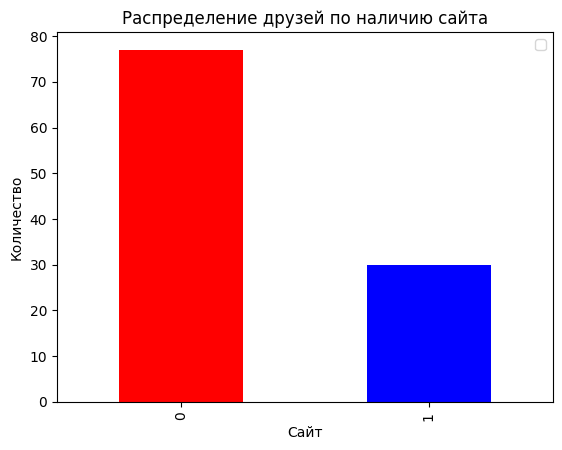

In [49]:
df_copy_site['site'].fillna(0, inplace = True)

for i in df_copy_site.site:
  if i != 0: df_copy_site.site.replace(i, 1, inplace=True)

draw_plot(df_copy_site, 'site', 'Сайт', 'Количество', 'Распределение друзей по наличию сайта')

### **4.19. Работа с признаком wall_default**

In [50]:
df_copy_wall_default = df_copy_site.copy(deep=True)

df_copy_wall_default.wall_default.unique()

array(['all', 'owner'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


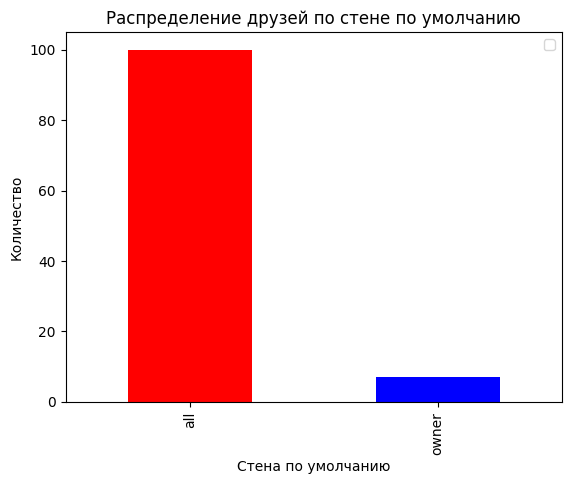

In [51]:
draw_plot(df_copy_wall_default, 'wall_default', 'Стена по умолчанию', 'Количество', 'Распределение друзей по стене по умолчанию')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


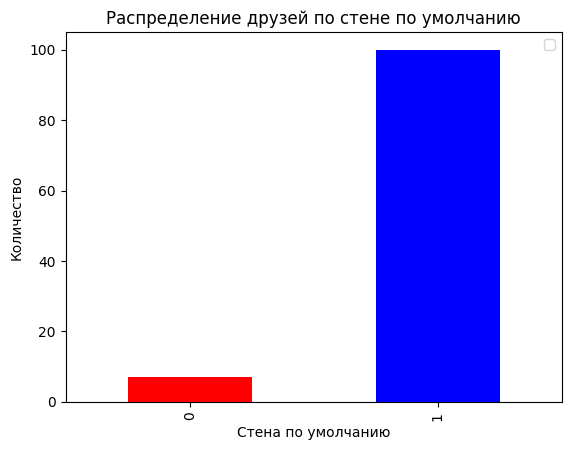

In [52]:
df_copy_wall_default.wall_default.replace('all', 1, inplace=True)
df_copy_wall_default.wall_default.replace('owner', 0, inplace=True)
draw_plot(df_copy_wall_default, 'wall_default', 'Стена по умолчанию', 'Количество', 'Распределение друзей по стене по умолчанию')

### **4.20. Работа с признаком counters**

In [53]:
df_copy_counters = df_copy_wall_default.copy(deep=True)

In [54]:
df_copy_counters['albums'] = 0
df_copy_counters['audios'] = 0
df_copy_counters['friends'] = 0
df_copy_counters['photos'] = 0
df_copy_counters['videos'] = 0

m = 0
for i in df_copy_counters.counters:

  d = eval(i)
  df_copy_counters['albums'][m] = d['albums']
  df_copy_counters['audios'][m] = d['audios']
  df_copy_counters['friends'][m] = d['friends']
  df_copy_counters['photos'][m] = d['photos']
  df_copy_counters['videos'][m] = d['videos']

  m += 1

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1221/2114381075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_counters['albums'][m] = d['albums']
/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1221/2114381075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_counters['audios'][m] = d['audios']
/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1221/2114381075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

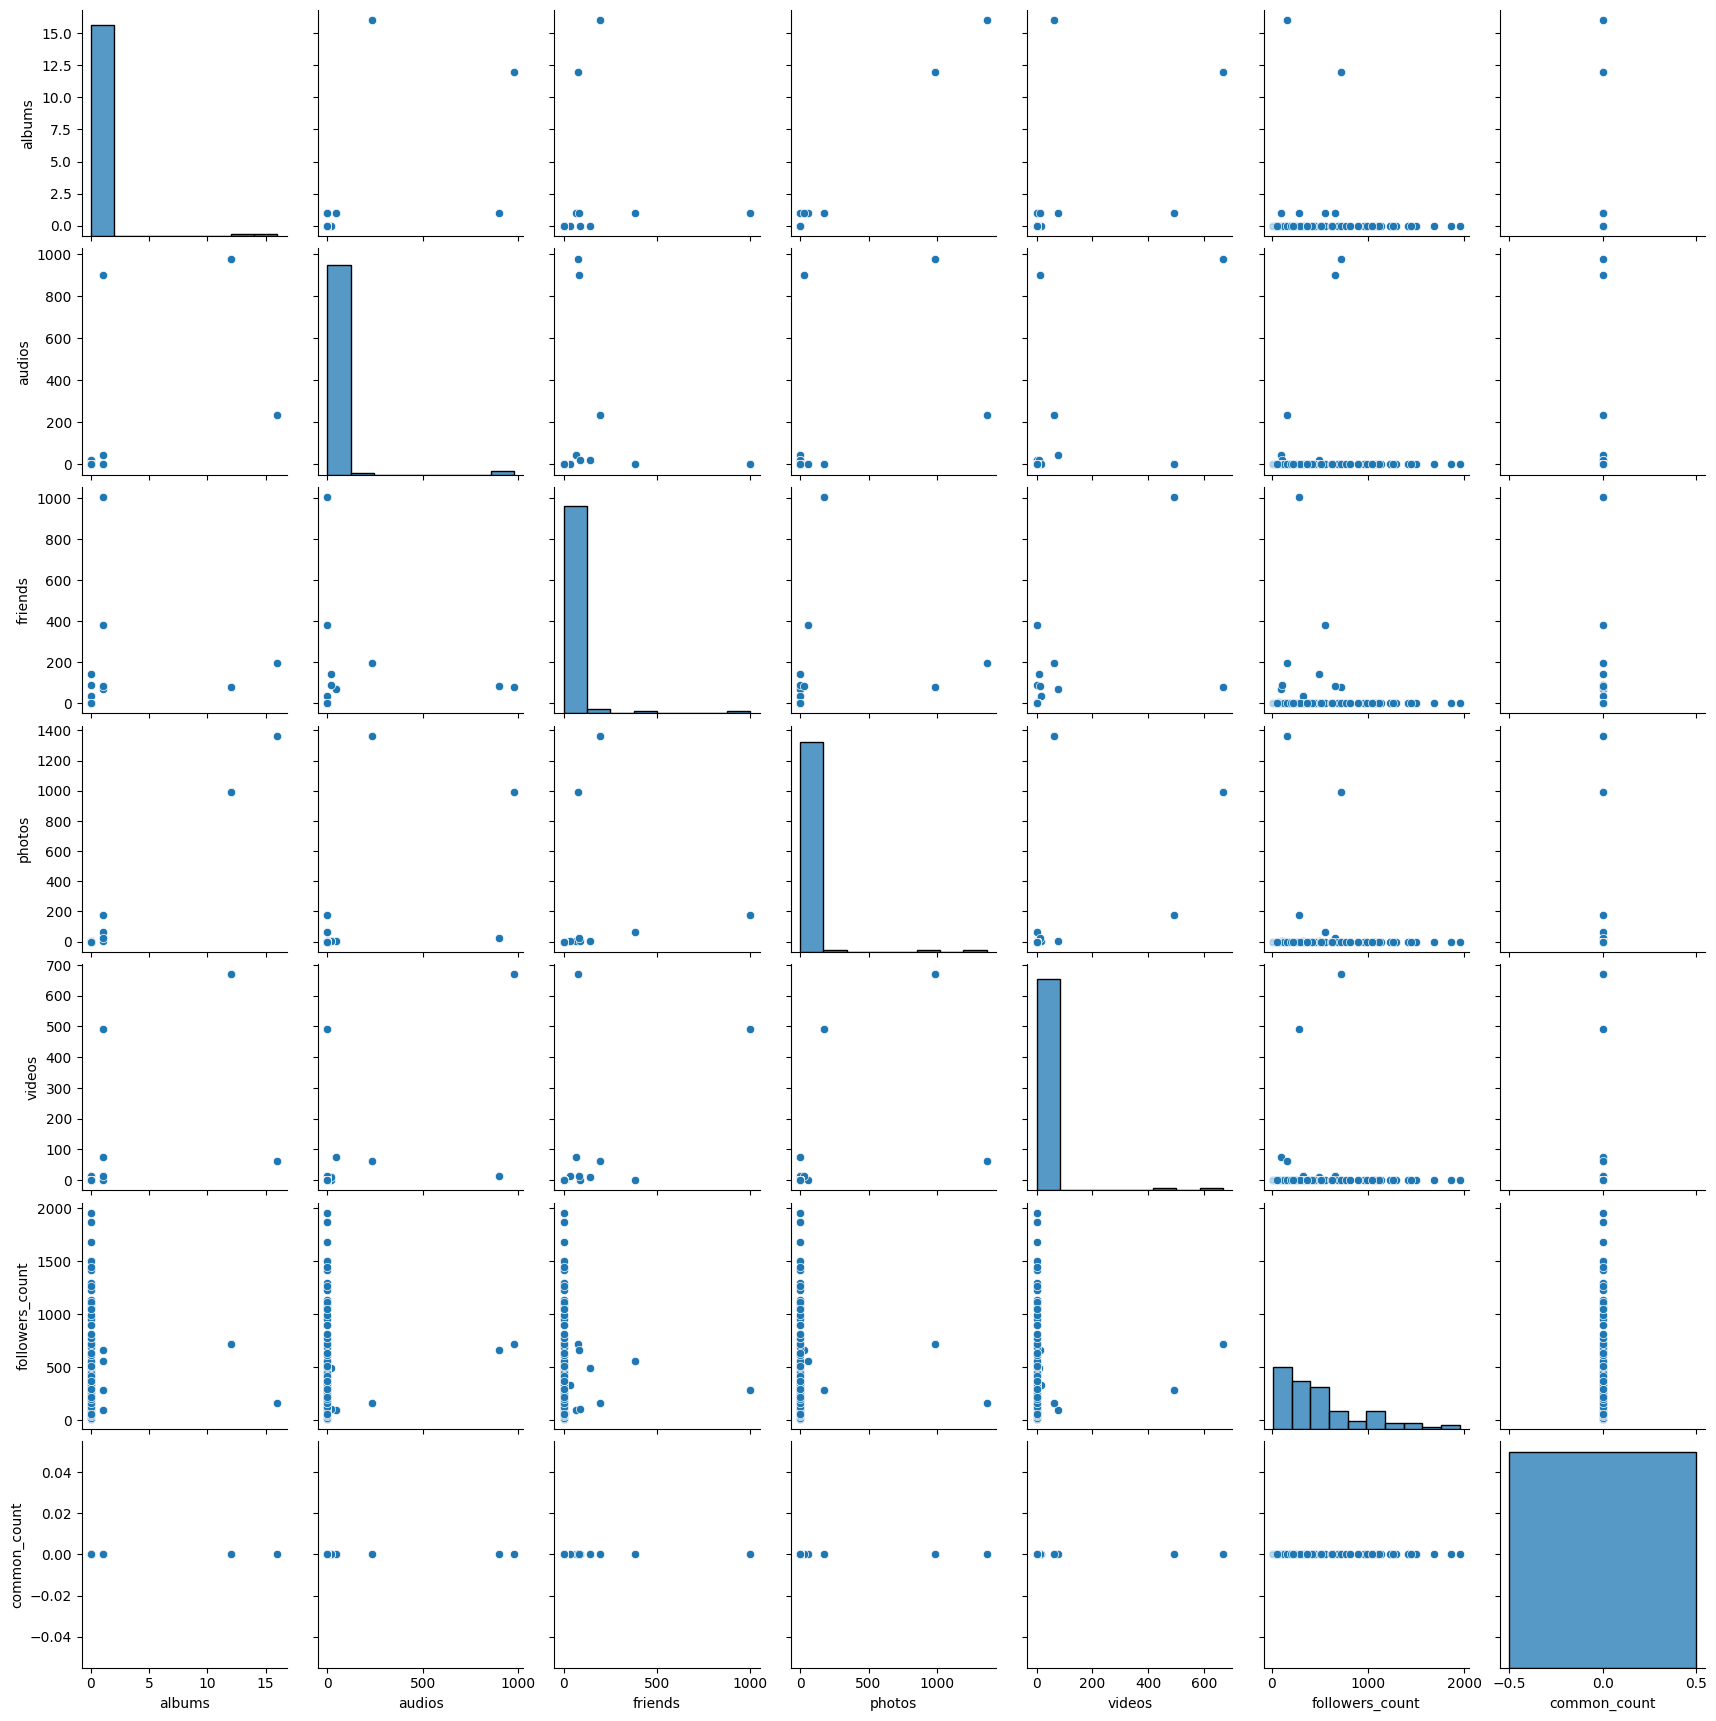

In [55]:
sns.pairplot(data=df_copy_counters[['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']])

#### **4.20.1. Удаление выбросов**

In [56]:
columns = ['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']

In [57]:
for i in columns:
  Q3 = np.quantile(df_copy_counters[i], 0.85)
  Q1 = np.quantile(df_copy_counters[i], 0.25)
  TIQR = 3 * (Q3 - Q1)
  df_copy_counters = df_copy_counters.drop(df_copy_counters[df_copy_counters[i] > (Q3 + TIQR)].index)
  df_copy_counters = df_copy_counters.drop(df_copy_counters[df_copy_counters[i] < (Q1 - TIQR)].index)

In [58]:
df_copy_counters = df_copy_counters.reset_index()

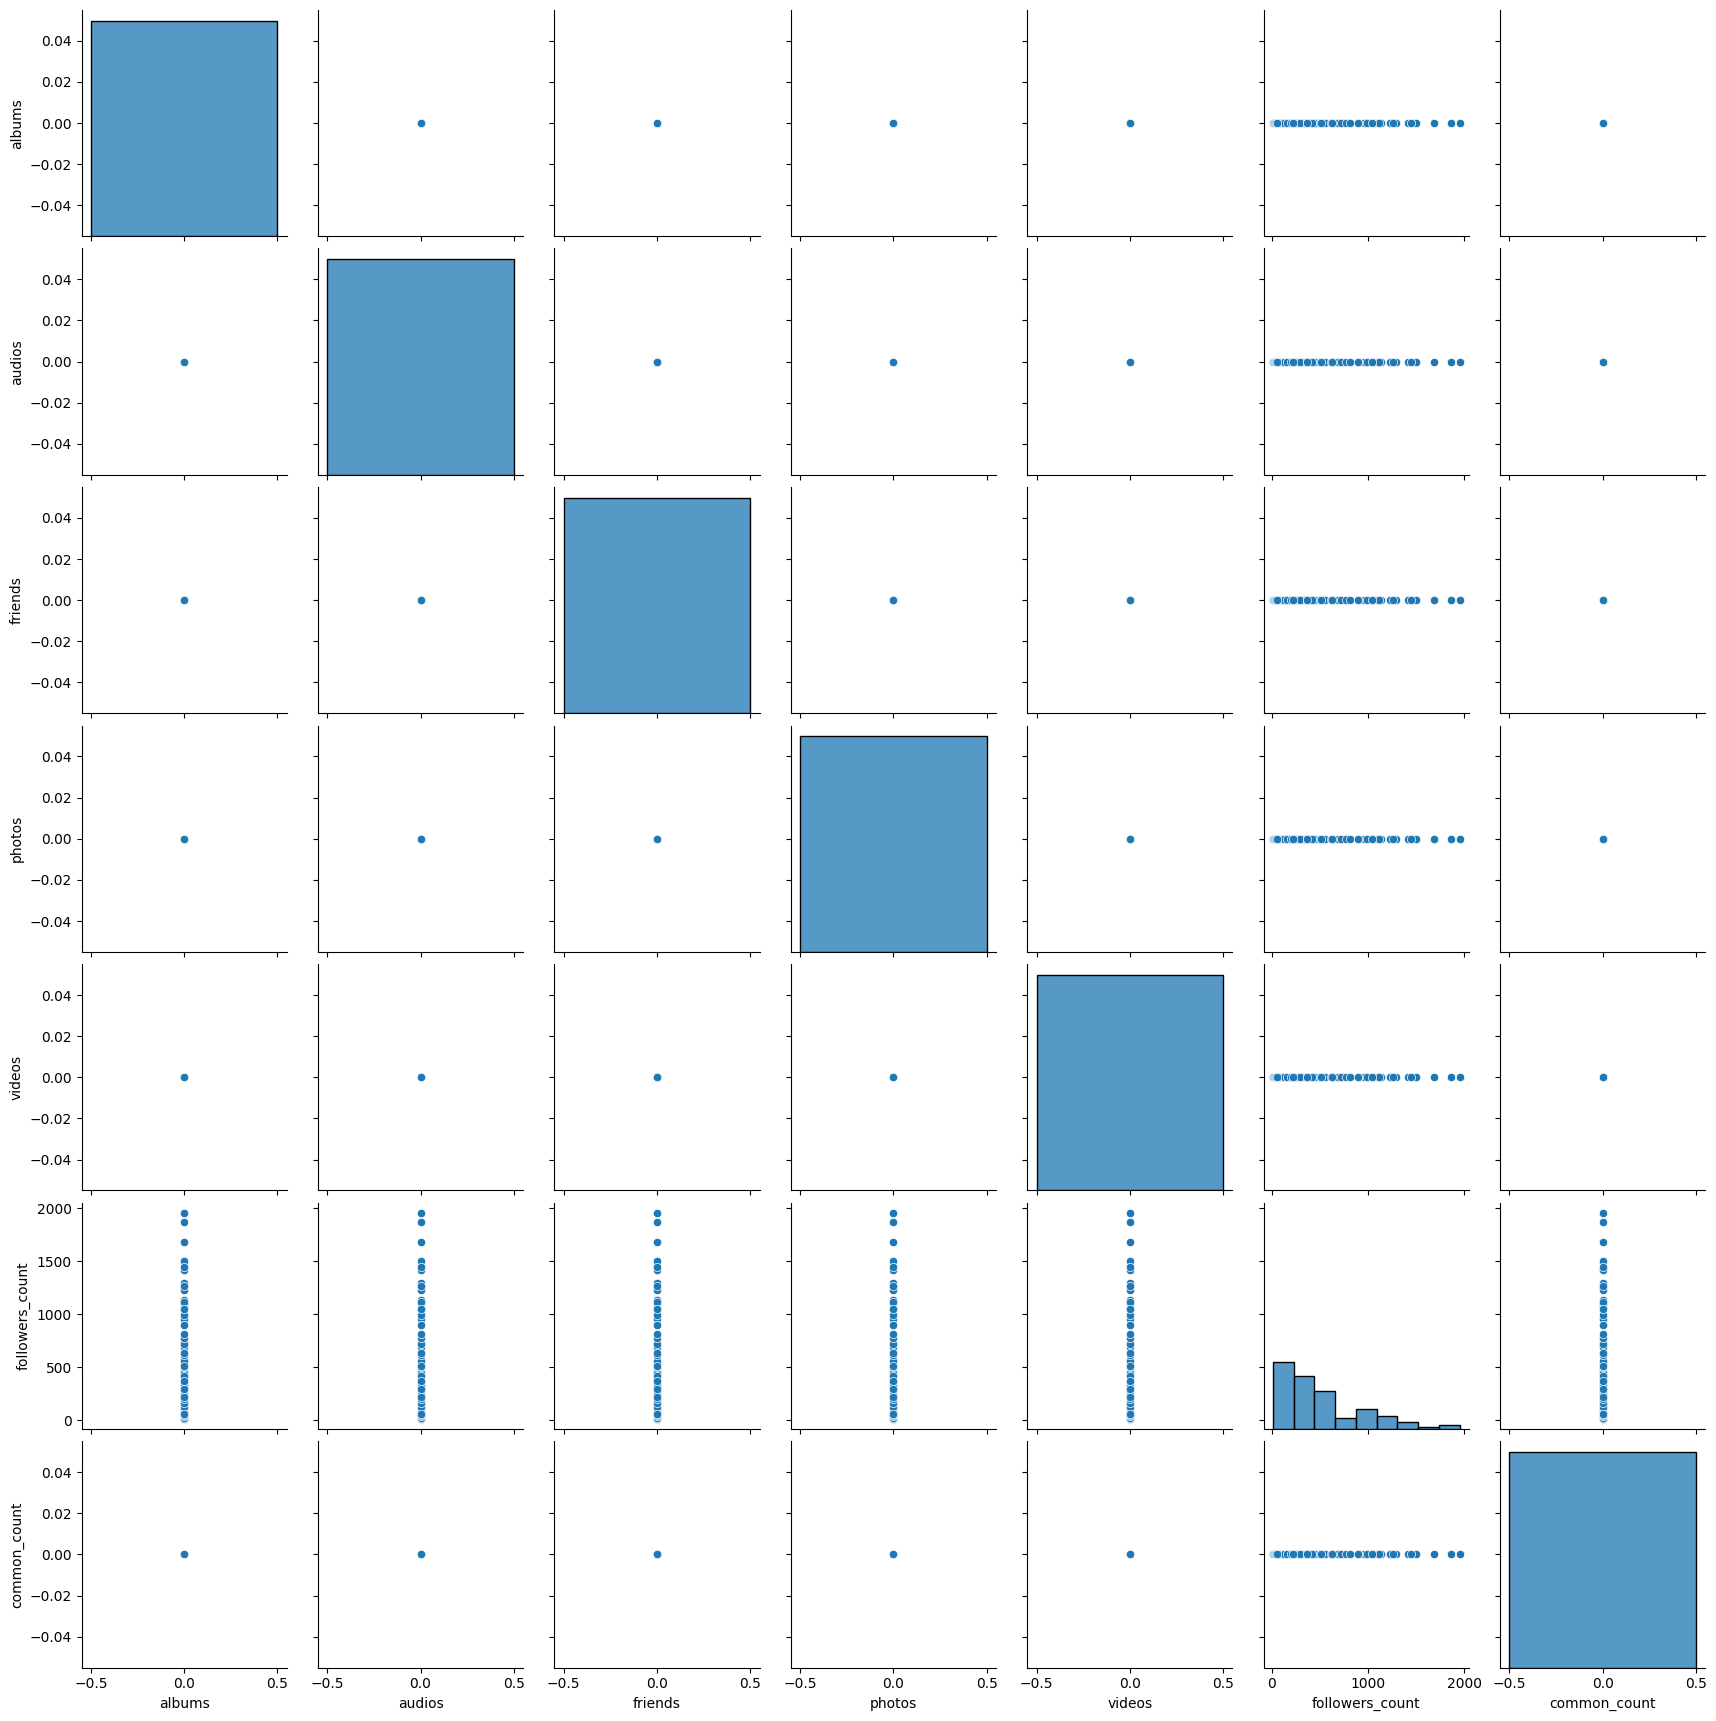

In [59]:
sns.pairplot(data=df_copy_counters[['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']])

### **4.21. Работа с признаком bdate**

In [60]:
df_copy_bdate = df_copy_counters.copy(deep=True)

In [61]:
df_copy_bdate.columns

Index(['index', 'first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
       'home_town', 'followers_count', 'common_count', 'can_see_audio',
       'online', 'city', 'can_post', 'can_see_all_posts', 'status', 'relation',
       'universities', 'nickname', 'counters', 'occupation', 'site',
       'wall_default', 'albums', 'audios', 'friends', 'photos', 'videos'],
      dtype='object')

### **4.22. Работа с признаком country**

In [62]:
df_copy_country = df_copy_counters.copy(deep=True)
df_copy_country.country.unique()

array(["{'id': 1, 'title': 'Россия'}", "{'id': 229, 'title': 'Япония'}",
       "{'id': 14, 'title': 'Эстония'}", "{'id': 7, 'title': 'Грузия'}",
       "{'id': 49, 'title': 'Великобритания'}",
       "{'id': 2, 'title': 'Украина'}", nan], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


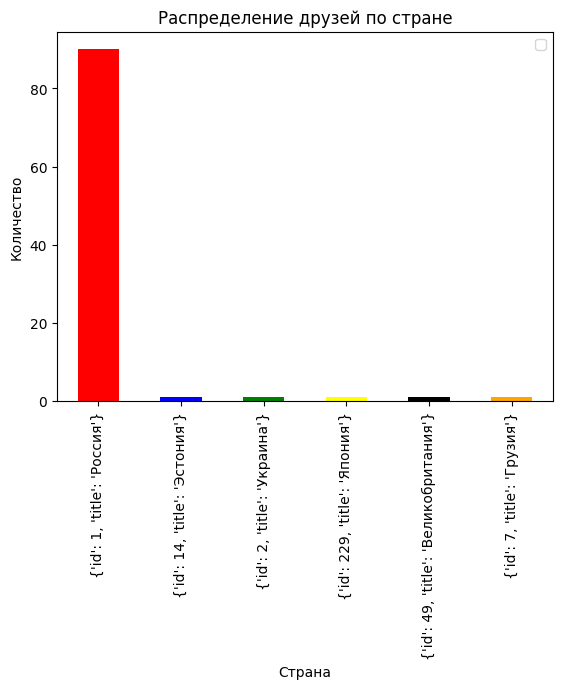

In [63]:
draw_plot(df_copy_country, 'country', 'Страна', 'Количество', 'Распределение друзей по стране')

#### **4.22.1. Мои друзья с России, поэтому признак страны не будет являться информативным**

In [64]:
del df_copy_country['country']

### **4.23. Работа с признаком occupation**

In [65]:
df_copy_occupation = df_copy_country.copy(deep=True)

In [66]:
df_copy_occupation.occupation

0     {'id': 2, 'name': 'МГУ', 'type': 'university',...
1                                                   NaN
2     {'id': 1, 'name': 'СПбГУ', 'type': 'university...
3                {'name': 'CyberAgent', 'type': 'work'}
4     {'id': 219, 'name': 'МАИ', 'type': 'university...
                            ...                        
92    {'id': 56, 'name': 'СПбГПУ Политех', 'type': '...
93                  {'name': 'НИИЦиМФ', 'type': 'work'}
94    {'id': 334, 'name': 'РГУНГ им. Губкина', 'type...
95    {'id': 203810089, 'name': 'RUBRI', 'type': 'wo...
96                                                  NaN
Name: occupation, Length: 97, dtype: object

In [67]:
df_copy_occupation['occupation'].fillna("{'id': 11111, 'name': 'Не указано'}", inplace = True)

In [68]:
df_copy_occupation['work'] = 0

m = 0
for i in df_copy_occupation.occupation:

  d = eval(i)
  df_copy_occupation['work'][m] = d['name']

  m += 1

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1221/1358533779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_occupation['work'][m] = d['name']


### **4.24. Работа с признаком city**

In [69]:
df_copy_city = df_copy_occupation.copy(deep=True)

In [70]:
df_copy_city['city'].fillna("{'id': 11111, 'title': 'Другой'}", inplace = True)

In [71]:
df_copy_city.city.unique()

array(["{'id': 1, 'title': 'Москва'}",
       "{'id': 2, 'title': 'Санкт-Петербург'}",
       "{'id': 1914764, 'title': 'Tokyo'}",
       "{'id': 220, 'title': 'Таллин'}",
       "{'id': 11111, 'title': 'Другой'}",
       "{'id': 20691, 'title': 'Тосно'}",
       "{'id': 1965294, 'title': 'Тбилиси'}",
       "{'id': 123, 'title': 'Самара'}",
       "{'id': 859, 'title': 'Королёв'}",
       "{'id': 94, 'title': 'Нижнекамск'}",
       "{'id': 505, 'title': 'Борисоглебск'}",
       "{'id': 295, 'title': 'London'}",
       "{'id': 72, 'title': 'Краснодар'}",
       "{'id': 292, 'title': 'Одесса'}", "{'id': 104, 'title': 'Омск'}",
       "{'id': 35, 'title': 'Великий Новгород'}",
       "{'id': 99, 'title': 'Новосибирск'}",
       "{'id': 44, 'title': 'Геленджик'}",
       "{'id': 9528, 'title': 'Себеж'}", "{'id': 108, 'title': 'Орск'}"],
      dtype=object)

In [72]:
df_copy_city['city_new'] = 0

m = 0
for i in df_copy_city.city:

  d = eval(i)
  df_copy_city['city_new'][m] = d['title']

  m += 1

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1221/3758797772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_city['city_new'][m] = d['title']


In [73]:
df_copy_last = df_copy_city.copy(deep=True)

In [74]:
df_copy_last['followers_count'].fillna(0, inplace = True)

df_copy_last['can_see_audio'] = df_copy_last.can_see_audio.astype(int)
df_copy_last['can_see_all_posts'] = df_copy_last.can_see_all_posts.astype(int)
df_copy_last['followers_count'] = df_copy_last.followers_count.astype(int)
df_copy_last['common_count'] = df_copy_last.common_count.astype(int)

### **4.24. Создание синтетических признаков transparency_level и media**

In [75]:
df_copy_last['transparency_level'] = df_copy_last.can_see_audio + df_copy_last.can_post + df_copy_last.can_see_all_posts + df_copy_last.site + df_copy_last.wall_default

In [76]:
df_copy_last['media'] = df_copy_last.audios + df_copy_last.videos + df_copy_last.photos

In [77]:
df_copy_last.columns

Index(['index', 'first_name', 'last_name', 'id', 'sex', 'bdate', 'home_town',
       'followers_count', 'common_count', 'can_see_audio', 'online', 'city',
       'can_post', 'can_see_all_posts', 'status', 'relation', 'universities',
       'nickname', 'counters', 'occupation', 'site', 'wall_default', 'albums',
       'audios', 'friends', 'photos', 'videos', 'work', 'city_new',
       'transparency_level', 'media'],
      dtype='object')

In [78]:
del df_copy_last['index']

In [79]:
df_copy_last.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'home_town',
       'followers_count', 'common_count', 'can_see_audio', 'online', 'city',
       'can_post', 'can_see_all_posts', 'status', 'relation', 'universities',
       'nickname', 'counters', 'occupation', 'site', 'wall_default', 'albums',
       'audios', 'friends', 'photos', 'videos', 'work', 'city_new',
       'transparency_level', 'media'],
      dtype='object')

In [80]:
df_last = df_copy_last[
  [
    'sex', 'first_name', 'last_name', 'home_town', 'city_new', 'work', 'can_see_audio',
    'friends', 'followers_count', 'common_count', 'transparency_level', 'media', 'universities'
  ]
]

In [81]:
df_last.head()

,sex,first_name,last_name,home_town,city_new,work,can_see_audio,friends,followers_count,common_count,transparency_level,media,universities
0,1,Люда,Кузьмич,Москва,Москва,МГУ,1,0,115,0,4,0,"[{'chair': 367, 'chair_name': 'Периодической п..."
1,2,Саша,Токарев,Novy Urengoy,Москва,Не указано,0,0,172,0,1,0,[]
2,1,Ксения,Михайлова,Санкт-Петербург,Санкт-Петербург,СПбГУ,1,0,1498,0,3,0,"[{'chair': 16, 'chair_name': 'Эмбриологии', 'c..."
3,2,Вадим,Пряхин,"Санкт-Петербург, Ломоносов",Tokyo,CyberAgent,0,0,208,0,1,0,"[{'chair': 1763, 'chair_name': 'Безопасных инф..."
4,2,Евгений,Мирский,Москва,Москва,МАИ,0,0,178,0,2,0,"[{'chair': 2560, 'chair_name': 'Теории вероятн..."


### **5. Преобразование категориальных признаков в числовые**

In [82]:
from sklearn.preprocessing import *

df_le = df_last.copy(deep=True)
categorical_feature_mask = df_le.dtypes==object
categorical_cols = df_le.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df_le[categorical_cols] = df_le[categorical_cols].apply(lambda col: le.fit_transform(col))
df_le = df_le[categorical_cols]
#df_le = df_le.reset_index()
#df_le = df_le.astype(float)
#del df_le['index']

In [83]:
df_le.head()

,first_name,last_name,home_town,city_new,work,universities
0,37,42,15,8,22,53
1,54,85,0,8,26,0
2,35,50,32,15,45,9
3,13,63,33,1,2,19
4,27,49,15,8,21,43


### **6. Создание набора данных числовых признаков**

In [84]:
digit_feature_mask = df_last.dtypes==int
digit_cols = df_last.columns[digit_feature_mask].tolist()

In [85]:
digit_cols

['sex',
 'can_see_audio',
 'friends',
 'followers_count',
 'common_count',
 'transparency_level',
 'media']

In [86]:
df_digit = df_last[['sex', 'followers_count', 'common_count', 'friends', 'media', 'transparency_level']]

### **7. Тепловая карта числовых признаков**

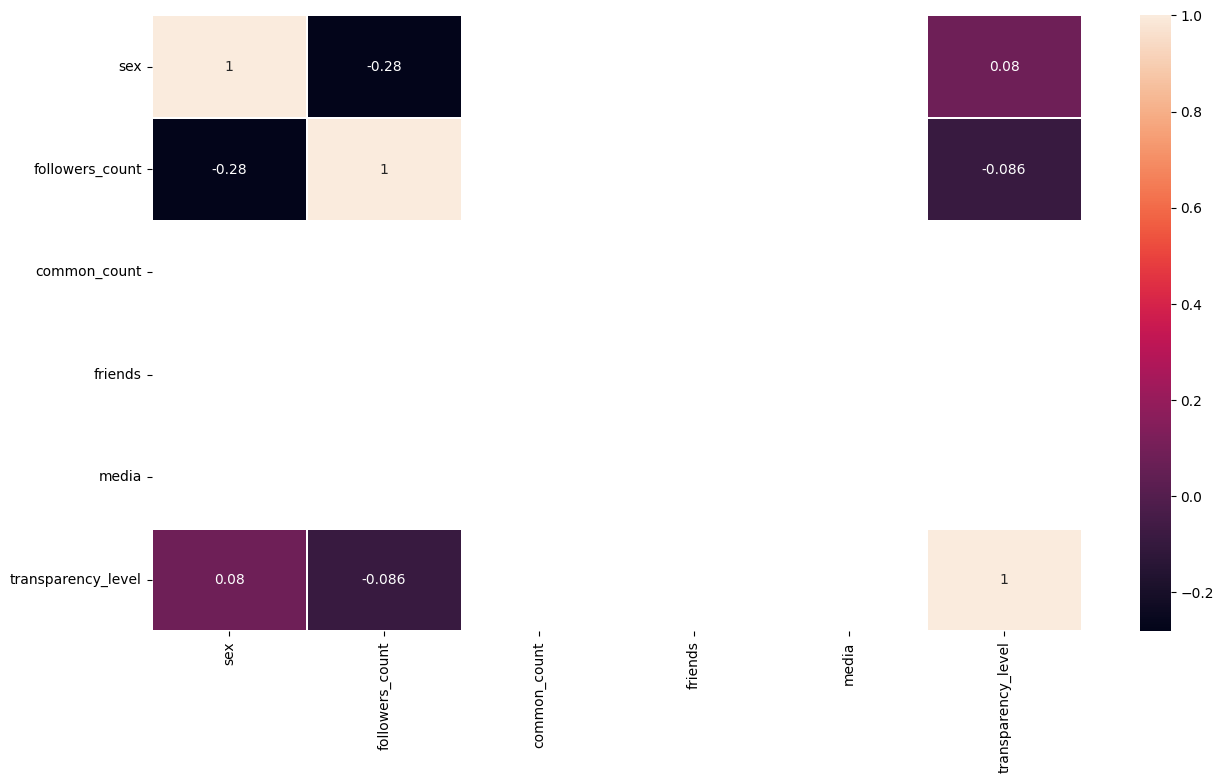

In [87]:
sns.heatmap(df_digit.corr(), annot=True, linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,8)

### **8. Создание готового набора данных для проведения кластеризации**

In [88]:
data = pd.concat([df_digit, df_le], axis=1)

In [89]:
data.head()

,sex,followers_count,common_count,friends,media,transparency_level,first_name,last_name,home_town,city_new,work,universities
0,1,115,0,0,0,4,37,42,15,8,22,53
1,2,172,0,0,0,1,54,85,0,8,26,0
2,1,1498,0,0,0,3,35,50,32,15,45,9
3,2,208,0,0,0,1,13,63,33,1,2,19
4,2,178,0,0,0,2,27,49,15,8,21,43


In [90]:
data.columns

Index(['sex', 'followers_count', 'common_count', 'friends', 'media',
       'transparency_level', 'first_name', 'last_name', 'home_town',
       'city_new', 'work', 'universities'],
      dtype='object')

### **9. Применение методов Scaler к набору данных**

In [91]:
df_norm = data.copy(deep=True)
df_minmax = data.copy(deep=True)
df_stand = data.copy(deep=True)
df_maxabs = data.copy(deep=True)
df_robust = data.copy(deep=True)
df_powert = data.copy(deep=True)

norm = Normalizer().fit(df_norm)
minmax = MinMaxScaler().fit(df_minmax)
stand = StandardScaler().fit(df_stand)
maxabs = MaxAbsScaler().fit(df_maxabs)
robust = RobustScaler().fit(df_robust)
powert = PowerTransformer().fit(df_powert)

df_to_norm = norm.transform(df_norm)
df_to_minmax = minmax.transform(df_minmax)
df_to_stand = stand.transform(df_stand)
df_to_maxabs = maxabs.transform(df_maxabs)
df_to_robust = robust.transform(df_robust)
df_to_powert = powert.transform(df_powert)

df_norm = pd.DataFrame(df_to_norm)
df_minmax = pd.DataFrame(df_to_minmax)
df_stand = pd.DataFrame(df_to_stand)
df_maxabs = pd.DataFrame(df_to_maxabs)
df_robust = pd.DataFrame(df_to_robust)
df_powert = pd.DataFrame(df_to_powert)

df_notscaled = data.copy(deep=True)

In [92]:
df_norm.name = 'Normalizer'
df_minmax.name = 'MinMaxScaler'
df_stand.name = 'StandardScaler'
df_maxabs.name = 'MaxAbsScaler'
df_robust.name = 'RobustScaler'
df_powert.name = 'PowerTransformer'
df_notscaled.name = 'Not Scaled'

### **10. Создание конвейера для подбора лучшей модели**

In [93]:
from sklearn.cluster import *
from sklearn.metrics import *

In [94]:
float_frames = [df_norm, df_minmax, df_stand, df_maxabs, df_robust, df_powert, df_notscaled]
methods = [KMeans(), MiniBatchKMeans(), 
           AffinityPropagation(), 
           AgglomerativeClustering(), 
           MeanShift()]

metrics = pd.DataFrame(columns=['Method', 'Scaler', 'Silhouette Score', 'Davies Bouldin Score', 'Inertia'])

In [95]:
r = 5

two_methods = ['KMeans', 'MiniBatchKMeans']

for j in float_frames:
  for l in methods:
    est = l.fit(j)

    method_name = str(est)[:str(est).find('(')]

    to_df = pd.DataFrame(est.labels_)
    to_df.columns = ['labels']
    n_labels = len(to_df.labels.unique())

    if method_name in two_methods:
      if n_labels > 1:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                        'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                        'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                        'Inertia': round(est.inertia_, r)}, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)
      else:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': round(est.inertia_, r)
                                }, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)
    else:
      if n_labels > 1:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': '-'
                                }, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)
      else:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': '-'
                                }, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)

/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

In [96]:
metrics[(metrics['Silhouette Score'] != '-') & (metrics['Davies Bouldin Score'] != '-')].sort_values(by='Silhouette Score', ascending=False)

,Method,Scaler,Silhouette Score,Davies Bouldin Score,Inertia
33,AgglomerativeClustering,Not Scaled,0.67809,0.45469,-
3,AgglomerativeClustering,Normalizer,0.62983,0.80262,-
34,MeanShift,Not Scaled,0.62221,0.53429,-
32,AffinityPropagation,Not Scaled,0.42129,0.67013,-
31,MiniBatchKMeans,Not Scaled,0.4007,0.71865,517265.38823
30,KMeans,Not Scaled,0.39898,0.72594,513496.87452
4,MeanShift,Normalizer,0.3975,0.62184,-
0,KMeans,Normalizer,0.37718,0.81455,1.74442
1,MiniBatchKMeans,Normalizer,0.31118,1.202,2.15482
8,AgglomerativeClustering,MinMaxScaler,0.2962,1.41184,-


### **Лучшая комбинация AgglomerativeClustering + Robust:**


In [97]:
ss_kmeans = []
bd_kmeans = []
ss_agg = []
bd_agg = []
ss_mb = []
bd_mb = []

x = df_robust

for k in range(2, 11):
  est = KMeans(n_clusters=k)
  est.fit(x)
  ss_kmeans.append(silhouette_score(x, est.labels_))
  bd_kmeans.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = AgglomerativeClustering(n_clusters=k)
  est.fit(x)
  ss_agg.append(silhouette_score(x, est.labels_))
  bd_agg.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = MiniBatchKMeans(n_clusters=k)
  est.fit(x)
  ss_mb.append(silhouette_score(x, est.labels_))
  bd_mb.append(davies_bouldin_score(x, est.labels_))

/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

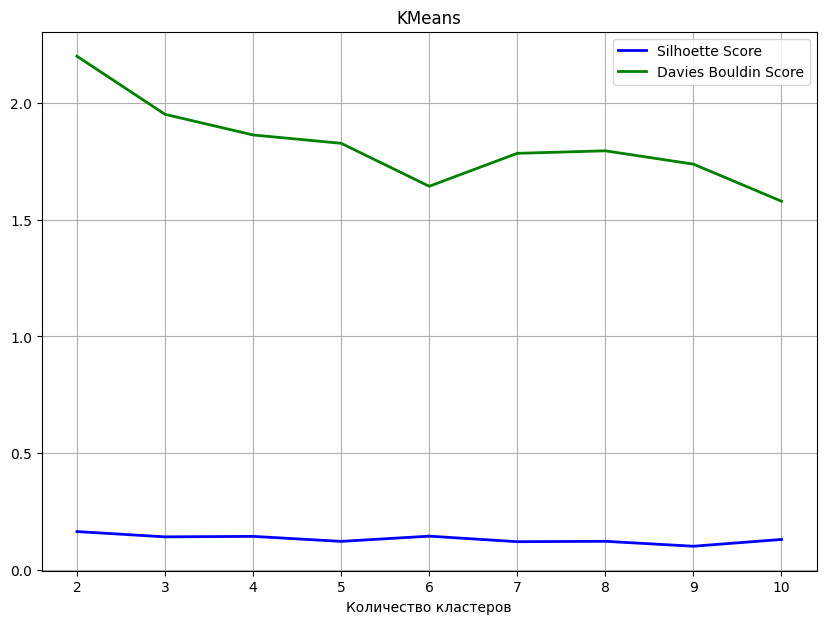

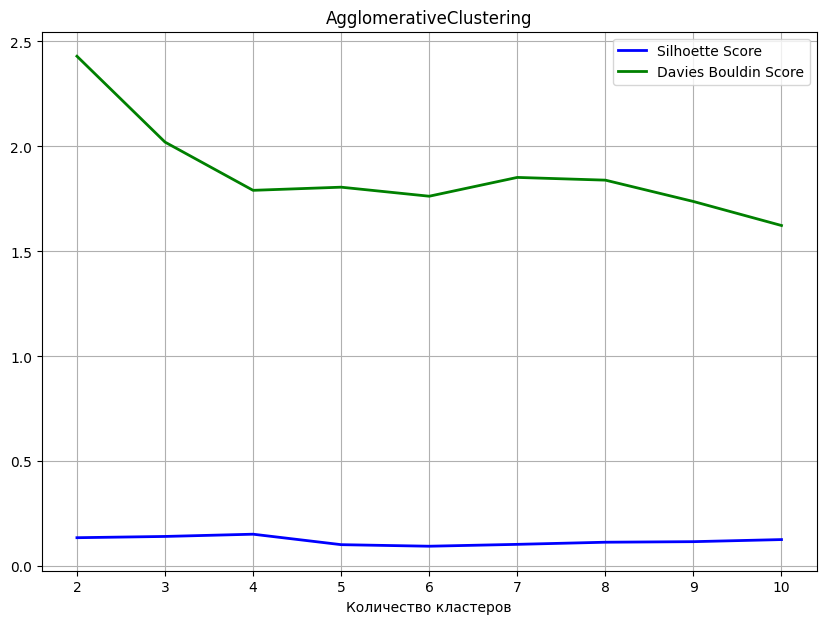

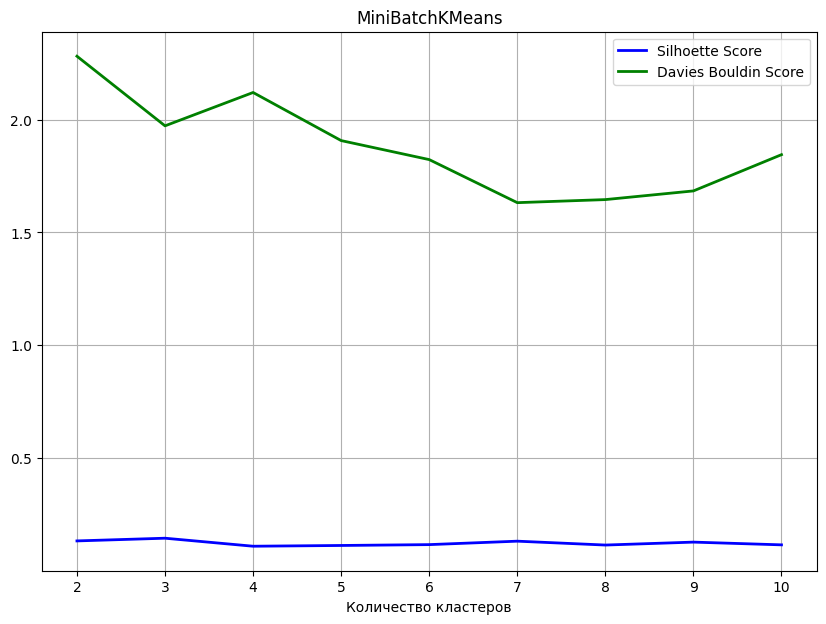

In [98]:
plt.figure(figsize=(10, 7))
plt.plot(ss_kmeans, linewidth=2, color='blue')
plt.plot(bd_kmeans, linewidth=2, color='green')
plt.title('KMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

points = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_agg, linewidth=2, color='blue')
plt.plot(bd_agg, linewidth=2, color='green')
plt.title('AgglomerativeClustering')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_mb, linewidth=2, color='blue')
plt.plot(bd_mb, linewidth=2, color='green')
plt.title('MiniBatchKMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

1. KMeans предлагает оптимальное количество кластеров 7, так как при таком количестве кластеров DBS еще не сильно скакнул, а SS максимально. 

2. AgglomerativeClustering предлагает оптимальное количество кластеров 5, так как DBS и SS максимальное

3. MiniBatchKMeans предлагает оптимальное количество кластеров 7, так как при таком количестве кластеров DBS подходящий, а SS оптимальный

In [99]:
x = df_maxabs
est = AgglomerativeClustering(n_clusters=5)
est.fit(x)

AgglomerativeClustering(n_clusters=5)

In [100]:
print('SS/DBS', 
      round(silhouette_score(x, est.labels_), 5),
      '/',
      round(davies_bouldin_score(x, est.labels_), 5))

SS/DBS 0.08903 / 2.08732


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


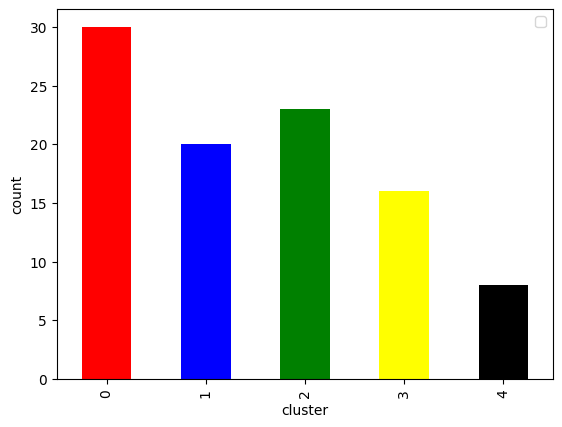

In [101]:
labels = pd.DataFrame(est.labels_)
labels.columns = ['cluster']
df_clusters = pd.concat([df_last, labels], axis=1)
draw_plot(df_clusters, 'cluster', 'cluster', 'count', '')

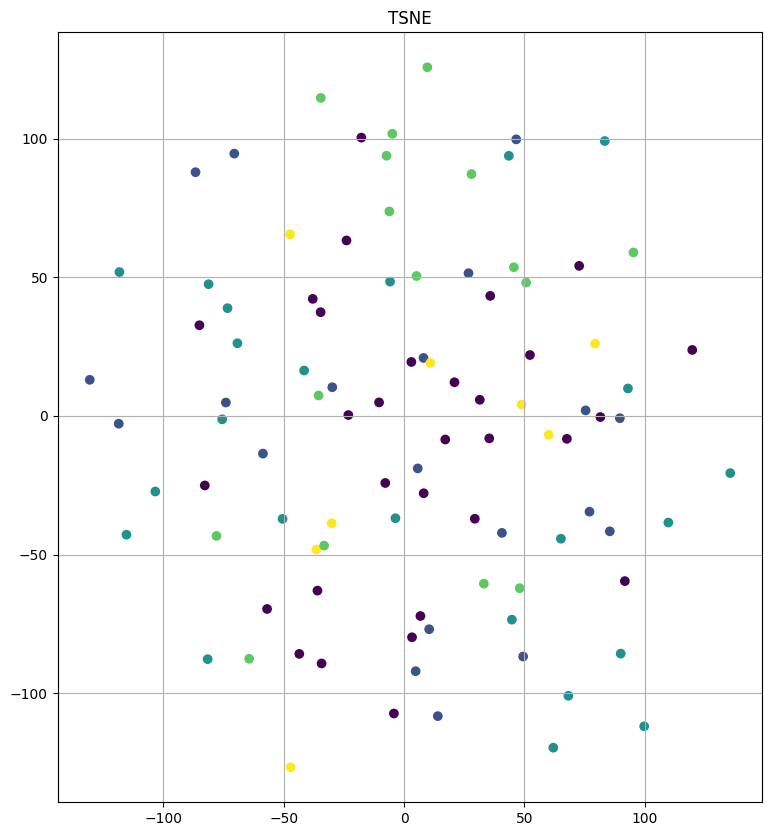

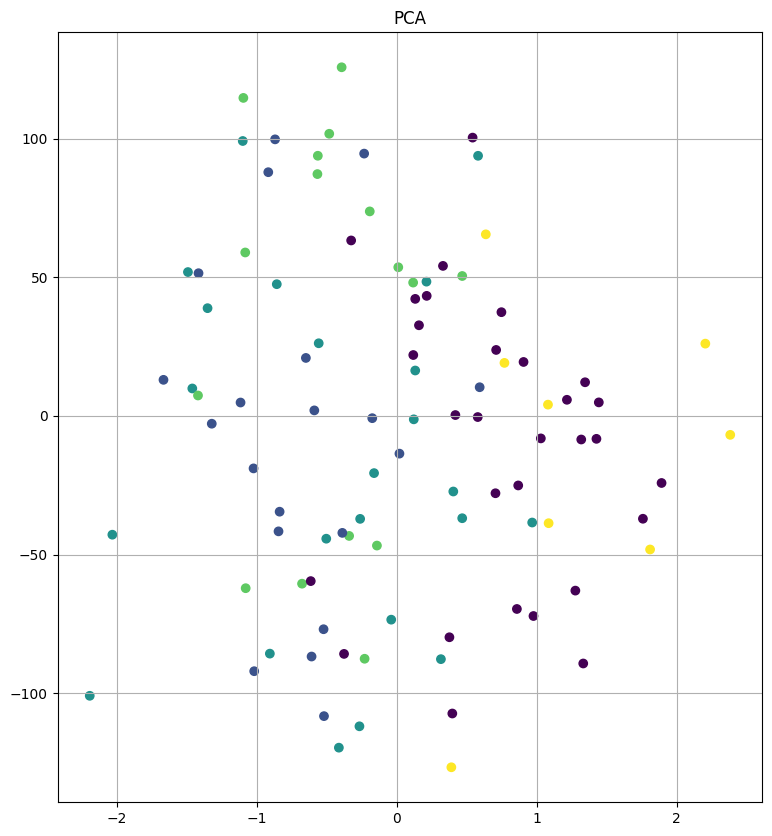

In [102]:
from sklearn.manifold import *
from sklearn.decomposition import PCA

x = df_robust

tsne = TSNE(
    n_components=3,
    random_state=22,
).fit_transform(x)

pca = PCA(
    n_components=3,
    random_state=22,
    tol=0.1
).fit_transform(x)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=est.labels_)
plt.title('TSNE')
plt.grid(True)

plt.figure(figsize=(20, 10))
plt.subplot(122)
plt.scatter(pca[:, 0], tsne[:, 1], c=est.labels_)
plt.title('PCA')
plt.grid(True)

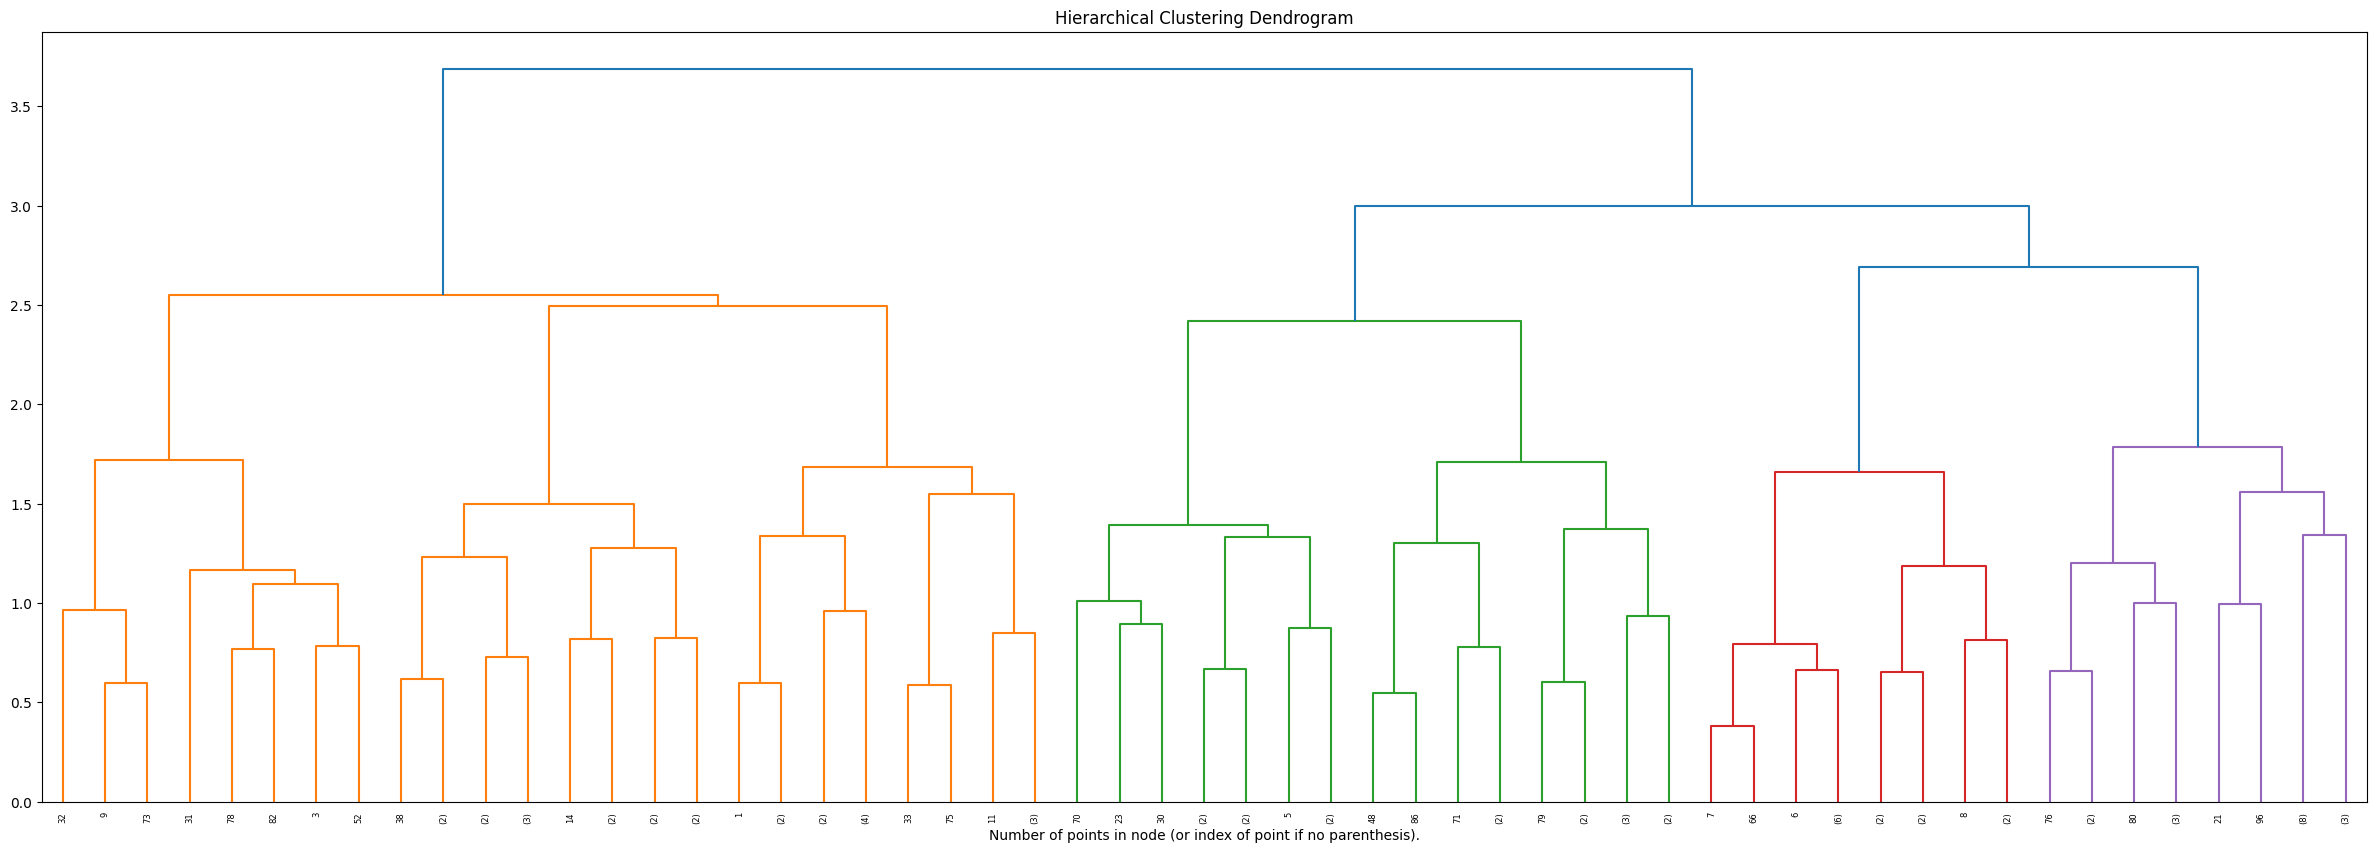

In [377]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_maxabs)
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()